# Data visualizations

In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
sales = pd.read_csv("SalesData.csv")

In [20]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


### 1. Compare Sales by region for 2016 with 2015 using bar chart

In [21]:
# sales1 = sales.groupby(['...']).aggregate(...) or .agg(..)
sales1 = sales.groupby(sales['Region']).agg(sum)
sales1=sales1[['Sales2015','Sales2016']].round()
sales1

,Sales2015,Sales2016
Region,,
Central,7891729.0,9787809.0
East,9512916.0,12667230.0
West,5349745.0,7209689.0


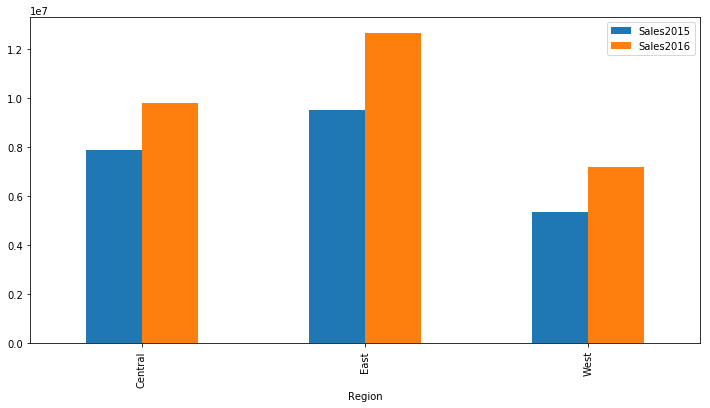

In [22]:
sales1graph=sales1.plot.bar(figsize=(12,6))

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

In [23]:
# sales2 = sales.groupby(['...']).aggregate({})
sales2= sales.groupby(sales['Region']).agg(sum)
sales2= sales2[['Sales2016']]
sales2

,Sales2016
Region,
Central,9.787809e+06
East,1.266723e+07
West,7.209689e+06


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002AB3401A828>],
      dtype=object)

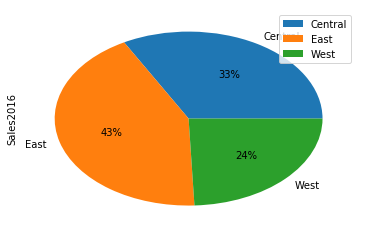

In [24]:

sales2.plot.pie(#colors=['r', 'g', 'b'],
            autopct='%1.0f%%', # to get percentage and round off appropriately
            fontsize=10, 
            subplots='true')

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [25]:
sales3 = sales.groupby(['Region','Tier']).agg(sum)
sales3
sales3= sales3[['Sales2015','Sales2016']].round()
sales3.unstack()

Sales2015                                Sales2016             \
Tier          High       Low        Med      Out       High        Low   
Region                                                                   
Central  4798698.0  943440.0  2068226.0  81365.0  6026043.0  1132833.0   
East     6102946.0  901666.0  2470998.0  37307.0  7817151.0  1144930.0   
West     2944789.0  671064.0  1718476.0  15415.0  3768038.0  1099502.0   

                            
Tier           Med     Out  
Region                      
Central  2632181.0 -3249.0  
East     3705150.0     0.0  
West     2342149.0     0.0

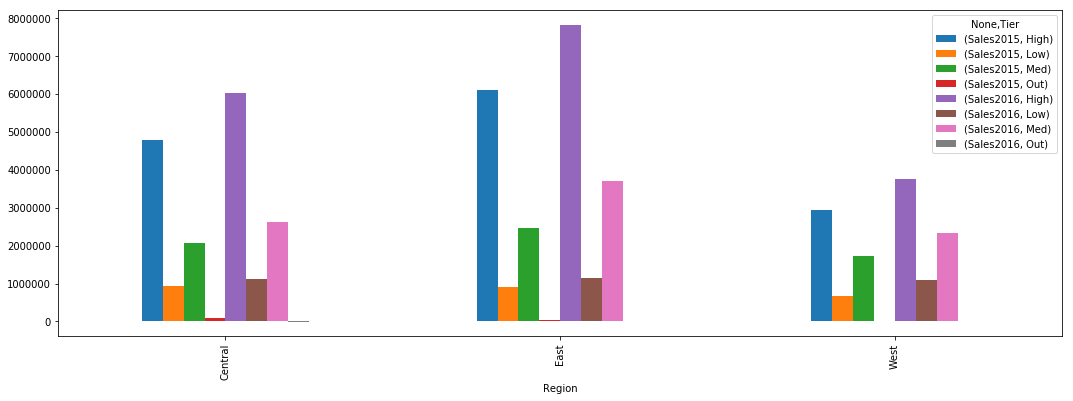

In [26]:
sales3graph=sales3.unstack().plot.bar(figsize=(18,6))

### 4. In East region, which state registered a decline in 2016 as compared to 2015?

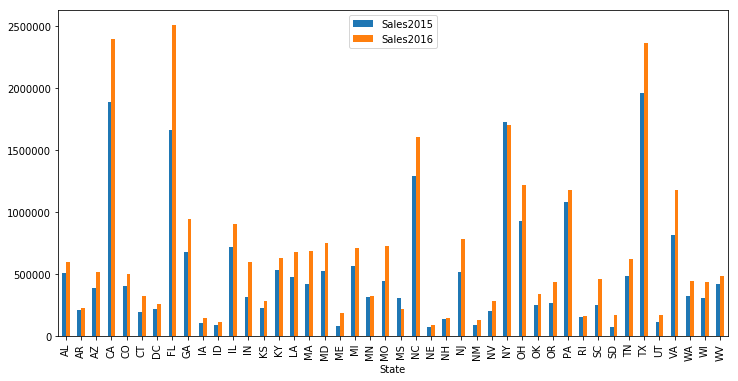

In [27]:
sales4 = sales.groupby(['State']).agg(sum).round()
sales4= sales4[['Sales2015','Sales2016']]
sales4graph=sales4.plot.bar(figsize=(12,6))

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

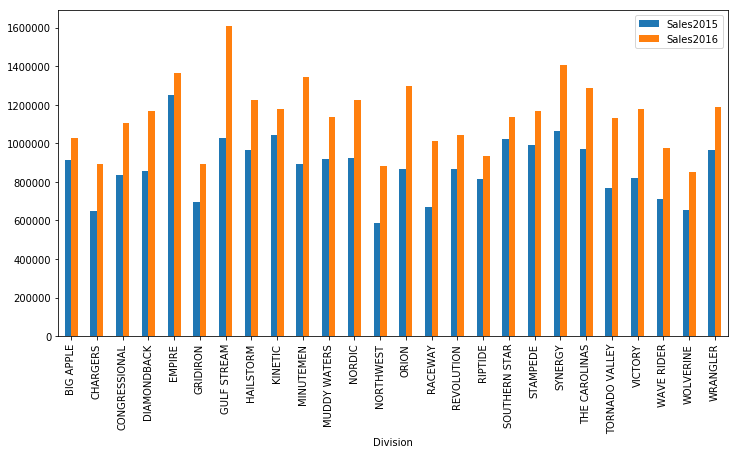

In [28]:
sales5 = sales.groupby(['Division']).agg(sum).round()
sales5= sales5[['Sales2015','Sales2016']]
sales5graph=sales5.plot.bar(figsize=(12,6))

### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
### •	Jan - Mar : Q1

### •	Apr - Jun : Q2

### •	Jul - Sep : Q3

### •	Oct - Dec : Q4   


In [29]:
sales['Qtr']=np.where((sales['Month']=='Jan') | (sales['Month']=='Feb') | (sales['Month']=='Mar'),'Q1','Q2')
sales['Qtr']=np.where((sales['Month']=='Apr') | (sales['Month']=='May') | (sales['Month']=='Jun'),'Q2',sales['Qtr'])
sales['Qtr']=np.where((sales['Month']=='Jul') | (sales['Month']=='Aug') | (sales['Month']=='Sep'),'Q3',sales['Qtr'])
sales['Qtr']=np.where((sales['Month']=='Oct') | (sales['Month']=='Nov') | (sales['Month']=='Dec'),'Q4',sales['Qtr'])


In [30]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3


### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot


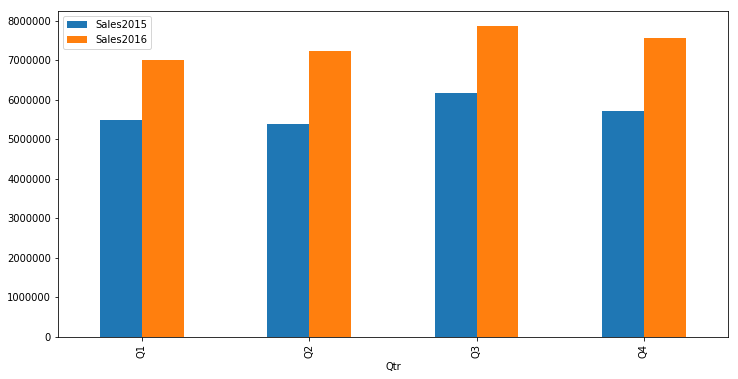

In [31]:
sales7=sales.groupby('Qtr').agg(sum).round()
sales7= sales7[['Sales2015','Sales2016']]
sales7graph=sales7.plot.bar(figsize=(12,6))

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [32]:
sales8= sales[['Qtr','Tier','Sales2016']]
sales8 = sales8[sales['Tier']!='Out']


In [33]:
#8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.
sales8 = sales8.groupby(['Qtr','Tier']).aggregate(sum)
sales8 = sales8.round(decimals=0)
sales8 = sales8.stack() # long to wide data
sales8 = sales8.unstack(level=0)
sales8

,Qtr,Q1,Q2,Q3,Q4
Tier,,,,,
High,Sales2016,3867719.0,4130953.0,4872559.0,4740002.0
Low,Sales2016,948833.0,890595.0,795178.0,742659.0
Med,Sales2016,2181402.0,2215814.0,2197058.0,2085207.0


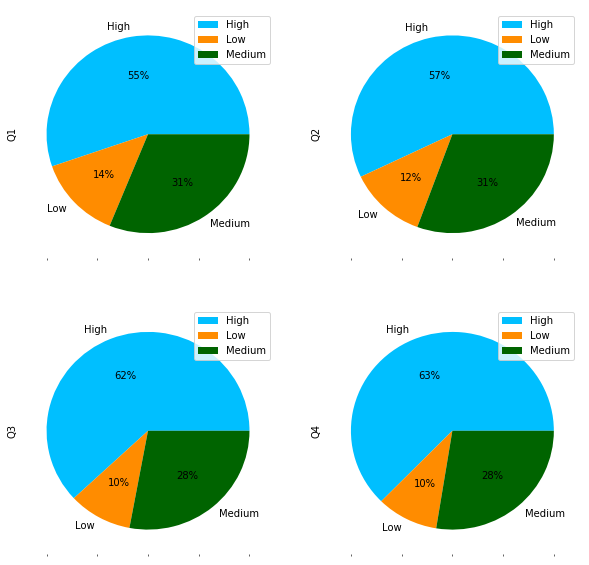

In [34]:
sales8.plot(kind='pie', 
            labels=['High', 'Low', 'Medium'], 
            colors=['deepskyblue', 'darkorange', 'darkgreen'],
            autopct='%1.0f%%',
            fontsize=10,
            subplots='true',
            layout=(2,2), #to get a grid
            figsize=(10,10))
plt.show()